In [1]:
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader, random_split
import sklearn.datasets as skd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#Generating synthetic dataset 
X,y = skd.make_regression(n_samples=100, n_features=1, n_targets=1, bias=0.5, noise=5.5, random_state=42)

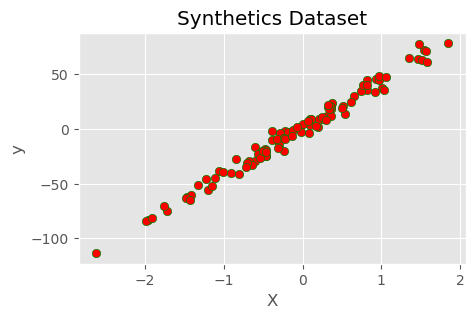

In [3]:
plt.figure(figsize = (5,3))
plt.style.use('ggplot')
plt.scatter(X[:,0], y, color='red', edgecolor='green')
#plt.scatter(X[:,1], y)
plt.title('Synthetics Dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [4]:
#preparing the Tensor dataset
inputs = torch.tensor(X, dtype=torch.float32)
targets = torch.tensor(y, dtype = torch.float32)
dataset = TensorDataset(inputs, targets)

In [5]:
#train, test and validation set formation
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

dataset_size = int(len(dataset))
train_size = int(train_ratio * dataset_size)
test_size = int(test_ratio * dataset_size)
val_size = int(val_ratio * dataset_size)

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

#finding the shape of the dataset
data, label = next(iter(train_dataset))

print(data.shape, label.shape)

torch.Size([1]) torch.Size([])


In [27]:
#Define the Neural Network for Regression
class Regression(nn.Module):
    def __init__(self, input_size, output_size, hidden_size):
        super(Regression, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size * 2)
        self.fc3 = nn.Linear(hidden_size * 2, hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = self.tanh(self.fc1(x))
        x = self.tanh(self.fc2(x))
        x = self.tanh(self.fc3(x))
        x = self.fc4(x)
        return x

In [28]:
#Creating the model, loss function and optimizer
model = Regression(input_size = 1, output_size=1, hidden_size = 64)
optimizer = optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.MSELoss()

In [29]:
#Batch processing the training, validation and testsets
train_loader = DataLoader(train_dataset, batch_size = 5, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = 5)
test_loader = DataLoader(test_dataset, batch_size = 10)

In [30]:
#R^2 Calculation
from sklearn.metrics import r2_score

def calculate_r2(model, loader):
    targets = []
    predictions = []
    model.eval()
    with torch.no_grad():
        for data, target in loader:
            output = model(data)
            predictions.extend(output.view(-1).tolist())
            targets.extend(target.view(-1).tolist())
    
    return r2_score(targets, predictions)

In [53]:
#List to store training and validation losses and accuracies
train_losses = []
val_losses = []
train_r2_scores = []
val_r2_scores = []

#Training and validation loop
n_epoch = 100
for epoch in range(n_epoch):
    model.train()
    train_loss = 0.0
    total = 0
    for data, label in train_loader:
        optimizer.zero_grad()
        output = model(data).view(-1) 
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    avg_train_loss = train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
   
    #validation
    model.eval()
    with torch.no_grad():
        val_loss = 0.0
        for data, target in val_loader:
            output = model(data)
            loss = criterion(data, output)
            val_loss += loss.item()
        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)
    
    #caluting r2 for training and validation set
    train_r2 = calculate_r2(model, train_loader)
    val_r2 = calculate_r2(model, val_loader)
    train_r2_scores.append(train_r2)
    val_r2_scores.append(val_r2)
    
    
    print(f'Epoch {epoch + 1}, Train_loss: {avg_train_loss}, Val_loss: {avg_val_loss}, Train_R^2:{ train_r2}, Val_R^2: {val_r2}')
    


Epoch 1, Train_loss: 23.373469863619125, Val_loss: 1472.8097877502441, Train_R^2:0.985420255590529, Val_R^2: 0.9835109059420397
Epoch 2, Train_loss: 23.281388963971818, Val_loss: 1534.7197799682617, Train_R^2:0.9855464309254973, Val_R^2: 0.9825516678392658
Epoch 3, Train_loss: 28.777509382792882, Val_loss: 1399.4470138549805, Train_R^2:0.9763206721227546, Val_R^2: 0.9752267462732522
Epoch 4, Train_loss: 29.152807235717773, Val_loss: 1674.0353927612305, Train_R^2:0.9801170660904526, Val_R^2: 0.9736732588544267
Epoch 5, Train_loss: 27.20824067933219, Val_loss: 1471.2985610961914, Train_R^2:0.9852153953147582, Val_R^2: 0.9835778068015397
Epoch 6, Train_loss: 23.000739778791154, Val_loss: 1509.3634414672852, Train_R^2:0.9856455286498677, Val_R^2: 0.982943472106014
Epoch 7, Train_loss: 24.28445896080562, Val_loss: 1619.6555938720703, Train_R^2:0.9839175134720822, Val_R^2: 0.9788864555773191
Epoch 8, Train_loss: 25.03586462565831, Val_loss: 1482.861312866211, Train_R^2:0.9853592422774966, Va

Epoch 73, Train_loss: 24.20374686377389, Val_loss: 1522.3356704711914, Train_R^2:0.9849768199587934, Val_R^2: 0.9825615908032168
Epoch 74, Train_loss: 25.584957940237864, Val_loss: 1542.6186637878418, Train_R^2:0.9847785534531979, Val_R^2: 0.9818873881181245
Epoch 75, Train_loss: 24.619494710649764, Val_loss: 1474.463695526123, Train_R^2:0.9852600431211541, Val_R^2: 0.9837040612095325
Epoch 76, Train_loss: 23.312002658843994, Val_loss: 1532.7865943908691, Train_R^2:0.9847669772556672, Val_R^2: 0.9816593898437234
Epoch 77, Train_loss: 26.84023462023054, Val_loss: 1494.9662322998047, Train_R^2:0.9853287847661159, Val_R^2: 0.9833000160060519
Epoch 78, Train_loss: 24.864636829921178, Val_loss: 1555.2175674438477, Train_R^2:0.9853810993632003, Val_R^2: 0.9822181691100637
Epoch 79, Train_loss: 23.642524787357875, Val_loss: 1454.5557861328125, Train_R^2:0.9848443839899284, Val_R^2: 0.9832060560494916
Epoch 80, Train_loss: 24.877602883747645, Val_loss: 1564.036018371582, Train_R^2:0.9840583685

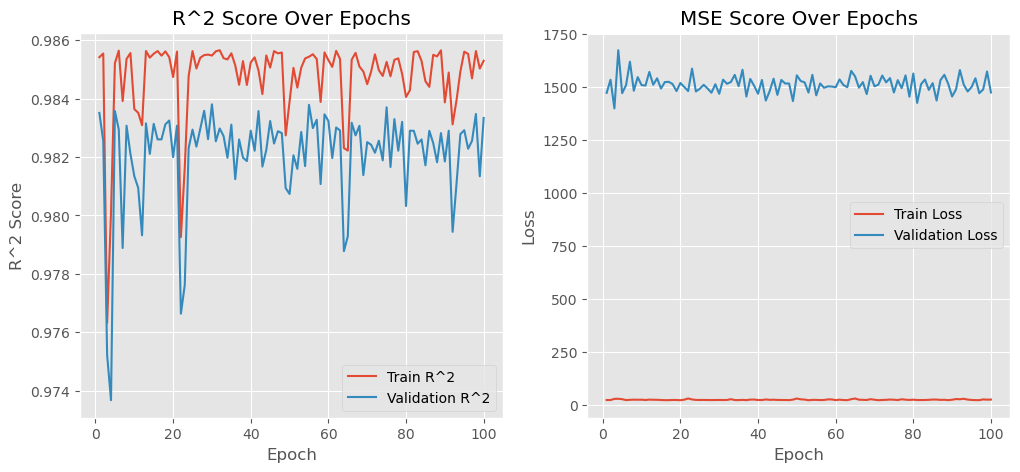

In [54]:
# Plotting MSE loss and the R^2 scores
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, n_epoch+1), train_r2_scores, label='Train R^2')
plt.plot(range(1, n_epoch+1), val_r2_scores, label='Validation R^2')
plt.xlabel('Epoch')
plt.ylabel('R^2 Score')
plt.title('R^2 Score Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, n_epoch+1), train_losses, label = 'Train Loss')
plt.plot(range(1, n_epoch+1), val_losses, label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('MSE Score Over Epochs')
plt.legend()
plt.show()

In [55]:
#performance on the testset
model.eval()
with torch.no_grad():
    test_loss = 0.0
    for data, target in test_loader:
        output = model(data)
        #output = output.view(-1)
        loss = criterion(output, data)
        test_loss += loss.item()
    avg_test_loss = test_loss/len(test_loader)
    test_r2_score = calculate_r2(model, test_loader)

print(f'Test Loss: {avg_test_loss}, Test_R^2: {test_r2_score}')
    

Test Loss: 1650.316650390625, Test_R^2: 0.9845054418367204


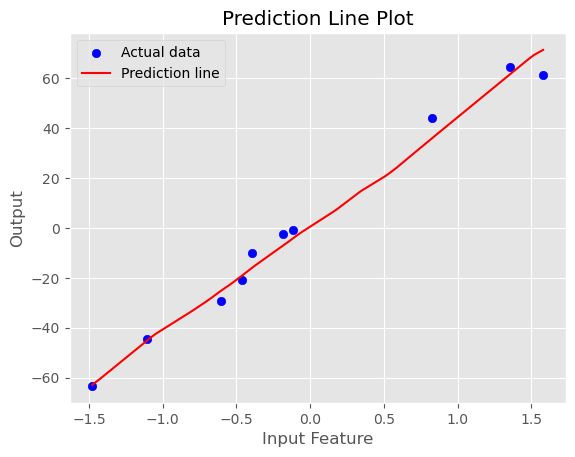

In [52]:
# Extract actual data points
actual_x = []
actual_y = []
for data, target in test_loader:
    actual_x.extend(data[:, 0].tolist())  # the first column is the feature of interest
    actual_y.extend(target.tolist())

# Generate a range of input values
x_values = np.linspace(min(actual_x), max(actual_x), 100)
x_values_tensor = torch.tensor(x_values, dtype=torch.float32).view(-1, 1)  # Reshape for the model

# Predict using the model
model.eval()
with torch.no_grad():
    predicted_y = model(x_values_tensor).view(-1).numpy()

# Plot the actual data points
plt.scatter(actual_x, actual_y, color='blue', label='Actual data')

# Plot the decision line
plt.plot(x_values, predicted_y, color='red', label='Prediction line')

plt.xlabel('Input Feature')
plt.ylabel('Output')
plt.title('Prediction Line Plot')
plt.legend()
plt.show()
